In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris

In [2]:
data=pd.read_csv("loan_data_set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info(),data.describe(),data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(None,
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 count       614.000000         614.000000  592.000000         600.00000   
 mean       5403.459283        1621.245798  146.412162         342.00000   
 std        6109.041673        2926.248369   85.587325          65.12041   
 min         150.000000           0.000000    9.000000          12.00000   
 25%        2877.500000           0.000000  100.000000         360.00000   
 50%        3812.500000        1188.500000  128.000000         360.00000   
 75%        5795.000000        2297.250000  168.000000         360.00000   
 max       81000.000000       41667.000000  700.000000         480.00000   
 
        Credit_History  
 count      564.000000  
 mean         0.842199  
 std          0.364878  
 min          0.000000  
 25%          1.000000  
 50%          1.000000  
 75%          1.000000  
 max          1.000000  ,
 (614, 13))

In [4]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

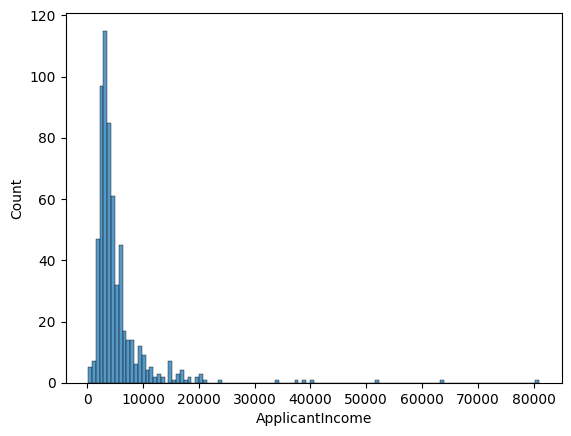

In [7]:
sns.histplot(data=data,x="ApplicantIncome") 

In [8]:
data["LoanAmount"]=data["LoanAmount"].fillna(data["LoanAmount"].mean())

In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
grouped_df=data[["LoanAmount","ApplicantIncome","CoapplicantIncome","Credit_History"]].groupby(data["Loan_Status"])

In [11]:
grouped_df.mean()

,LoanAmount,ApplicantIncome,CoapplicantIncome,Credit_History
Loan_Status,,,,
N,150.945488,5446.078125,1877.807292,0.541899
Y,144.349606,5384.068720,1504.516398,0.981818


In [13]:
grouped_df.median()

,LoanAmount,ApplicantIncome,CoapplicantIncome,Credit_History
Loan_Status,,,,
N,133.5,3833.5,268.0,1.0
Y,128.0,3812.5,1239.5,1.0


In [14]:
grouped_df.min()

,LoanAmount,ApplicantIncome,CoapplicantIncome,Credit_History
Loan_Status,,,,
N,9.0,150,0.0,0.0
Y,17.0,210,0.0,0.0


In [15]:
grouped_df.max()

,LoanAmount,ApplicantIncome,CoapplicantIncome,Credit_History
Loan_Status,,,,
N,570.0,81000,41667.0,1.0
Y,700.0,63337,20000.0,1.0


In [16]:
grouped_df.std()

,LoanAmount,ApplicantIncome,CoapplicantIncome,Credit_History
Loan_Status,,,,
N,83.361163,6819.558528,4384.060103,0.499639
Y,84.361109,5765.441615,1924.754855,0.133782


In [18]:
iris=load_iris()

In [19]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [20]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
df["target"]=iris.target

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
setosa=df[df["target"]==0]
setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [28]:
setosa.drop("target",axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


<Axes: >

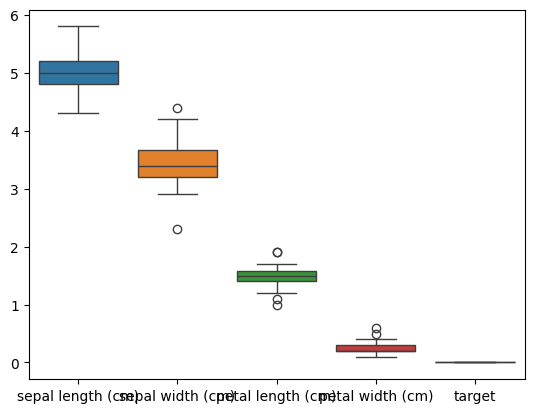

In [29]:
sns.boxplot(setosa)

In [30]:
setosa.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


In [31]:
vc=df[df["target"]==1]
vc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [32]:
vc.drop("target",axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4


In [33]:
vc.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


<Axes: >

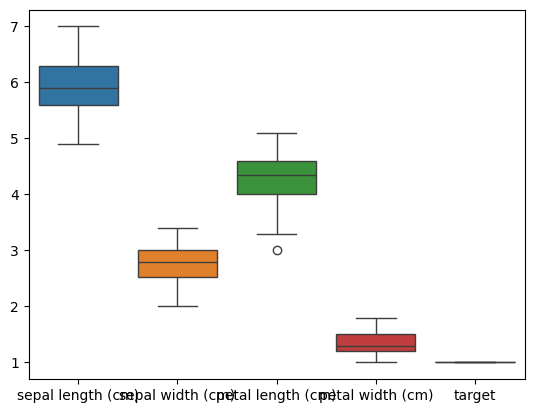

In [35]:
sns.boxplot(vc)